In [ ]:
#!pip install sklearn #安装package
from sklearn.tree import DecisionTreeClassifier # categorical outcome if your outcome is cts :DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# iris = load_iris()
# X = iris.data
# y = iris.target #(label)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) #training set(训练模型), testing set/validation（check performance）

模型准确率： 1.0


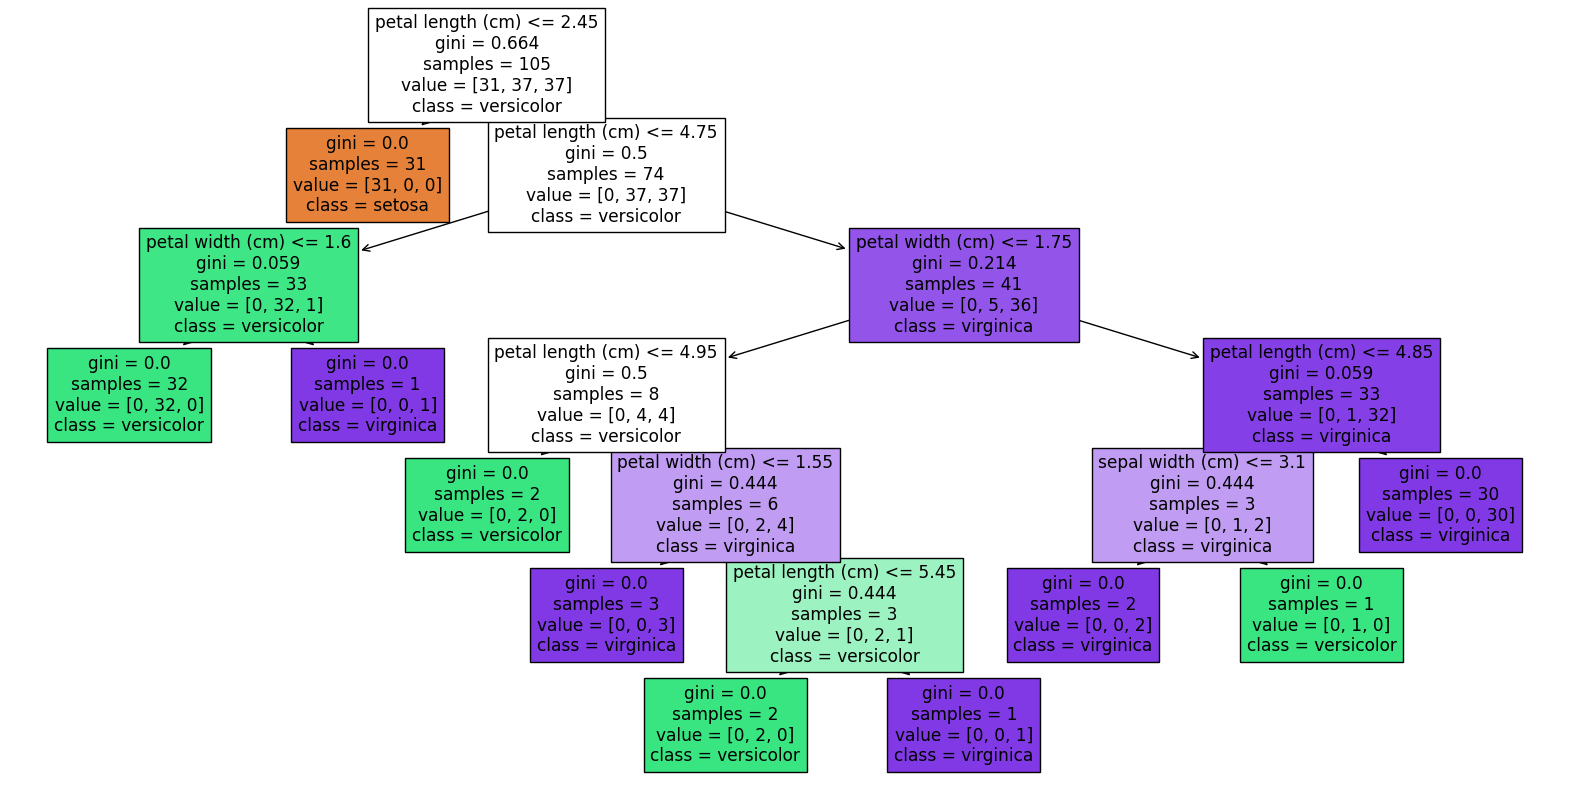

In [ ]:
# dtree = DecisionTreeClassifier(random_state=100)#建立pretrained模型
# dtree.fit(X_train, y_train)#把data放进去
# y_pred = dtree.predict(X_test) #得到的预测值
# accuracy = accuracy_score(y_test, y_pred)#performance
# print("模型准确率：", accuracy)

# plt.figure(figsize=(20,10))
# plot_tree(dtree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
# plt.show()


In [ ]:
#!pip install sklearn #安装package
from sklearn.tree import DecisionTreeClassifier # categorical outcome if your outcome is cts :DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only
data.shape

<ipython-input-1-6ab9607a3d05>:12: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


(11431, 1779)

In [ ]:
data.SURVEY_random_id.notna().value_counts()
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2.shape
dataV2.SURVEY_random_id.isna().value_counts()

,count
SURVEY_random_id,
True,9491
False,527


In [ ]:
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohort.shape

# And remove year 2023 for which there's not yet much data collected
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
dataV2_cohortV2.shape

# And remove columns that have less than some number of missing values
# We could consider no missing values using 850, or...?
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()
dataV2_cohortV3.shape

# The data itself then looks like this
pd.set_option('display.max_columns', dataV2_cohortV3.shape[1]) # Can cause jupyter notebooks to crash
# DO NOT USE in conjuection with pd.set_option('display.max_rows', 1000)
dataV2_cohortV3

,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_tired,WELLNESS_malach_pines_burnout_measure_disappointed,WELLNESS_malach_pines_burnout_measure_hopeless,WELLNESS_malach_pines_burnout_measure_trapped,WELLNESS_malach_pines_burnout_measure_helpless,WELLNESS_malach_pines_burnout_measure_depressed,WELLNESS_malach_pines_burnout_measure_sick,WELLNESS_malach_pines_burnout_measure_worthless,WELLNESS_malach_pines_burnout_measure_difficulty_sleeping,WELLNESS_malach_pines_burnout_measure_had_it,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_chat_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_walk_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_exercise_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_sex_p3m,LONELY_ucla_loneliness_scale_companionship,LONELY_ucla_loneliness_scale_left_out,LONELY_ucla_loneliness_scale_isolated,CONNECTION_social_num_close_friends_grouped,CONNECTION_social_days_family_p7d_grouped,CONNECTION_social_days_friends_p7d_grouped,CONNECTION_social_days_coworkers_and_classmates_p7d_grouped,CONNECTION_social_days_neighbours_p7d_grouped,CONNECTION_social_time_family_p7d_grouped,CONNECTION_social_time_friends_p7d_grouped,CONNECTION_social_time_coworkers_and_classmates_p7d_grouped,CONNECTION_social_time_neighbours_p7d_grouped,CONNECTION_social_num_family_p7d_grouped,CONNECTION_social_num_friends_p7d_grouped,CONNECTION_social_num_coworkers_and_classmates_p7d_grouped,CONNECTION_social_num_neighbours_p7d_grouped,CONNECTION_preference_time_family_grouped,CONNECTION_preference_time_friends_grouped,CONNECTION_preference_time_coworkers_classmates_grouped,CONNECTION_preference_time_neighbours_grouped,LONELY_dejong_emotional_social_loneliness_scale_emptiness,LONELY_dejong_emotional_social_loneliness_scale_rely,LONELY_dejong_emotional_social_loneliness_scale_trust,LONELY_dejong_emotional_social_loneliness_scale_close,LONELY_dejong_emotional_social_loneliness_scale_miss,LONELY_dejong_emotional_social_loneliness_scale_rejected,LONELY_direct,LONELY_change_pre_covid,LONELY_others_aware,PSYCH_zimet_multidimensional_social_support_scale_need,PSYCH_zimet_multidimensional_social_support_scale_joys,PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored,PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_comfort,PSYCH_zimet_multidimensional_social_support_scale_help,PSYCH_zimet_multidimensional_social_support_scale_go_wrong,PSYCH_zimet_multidimensional_social_support_scale_problems_family,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_feelings,PSYCH_zimet_multidimensional_social_support_scale_decisions,WELLNESS_self_rated_physical_health,WELLNESS_self_rated_me

In [ ]:
# dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'].isna().count()
dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'].dropna()
dataV2_cohortV3['CONNECTION_social_time_family_p7d_grouped'].dropna()
dataV2_cohortV3['CONNECTION_social_time_friends_p7d_grouped'].dropna()
dataV2_cohortV3['CONNECTION_social_time_neighbours_p7d_grouped'].dropna()

,CONNECTION_social_time_neighbours_p7d_grouped
19,1 to 4 hours
21,Less than 1 hour
71,Less than 1 hour
77,Less than 1 hour
78,1 to 4 hours
...,...
11379,Less than 1 hour
11380,Less than 1 hour
11412,Less than 1 hour
11428,Less than 1 hour


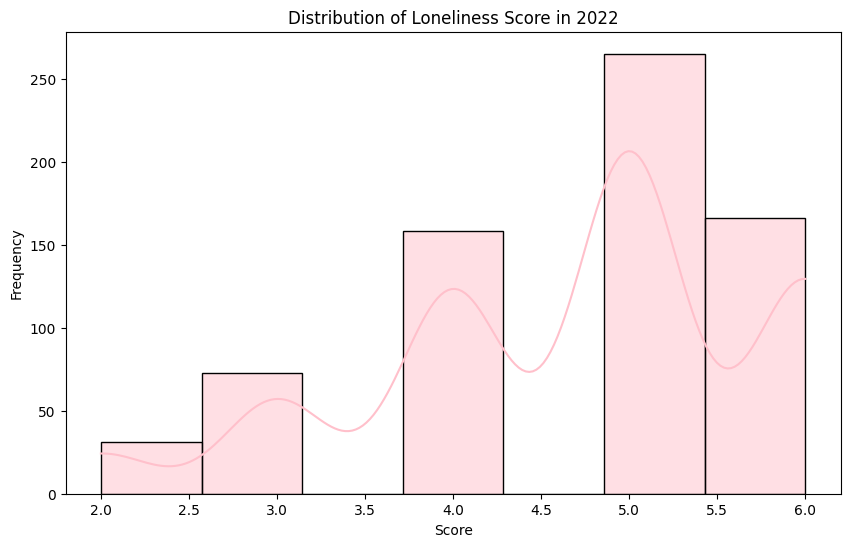

In [ ]:
import seaborn as sns
import plotly.express as px


#dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'].dropna()
plt.figure(figsize=(10, 6))
sns.histplot(dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'], bins=7, kde=True, color='pink')
plt.title('Distribution of Loneliness Score in 2022')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


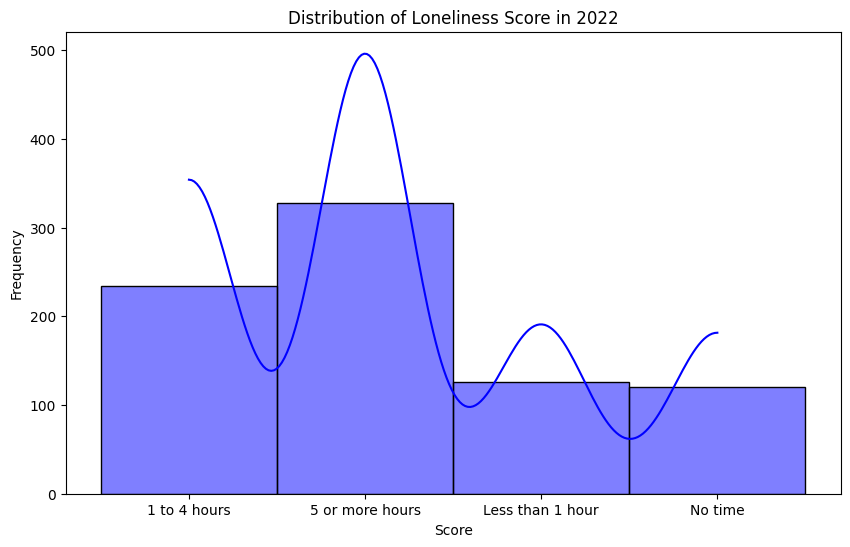

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataV2_cohortV3['CONNECTION_social_time_family_p7d_grouped'], bins=7, kde=True, color='blue')
plt.title('Distribution of Loneliness Score in 2022')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'], bins=7, kde=True, color='pink')
plt.title('Distribution of Loneliness Score in 2022')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

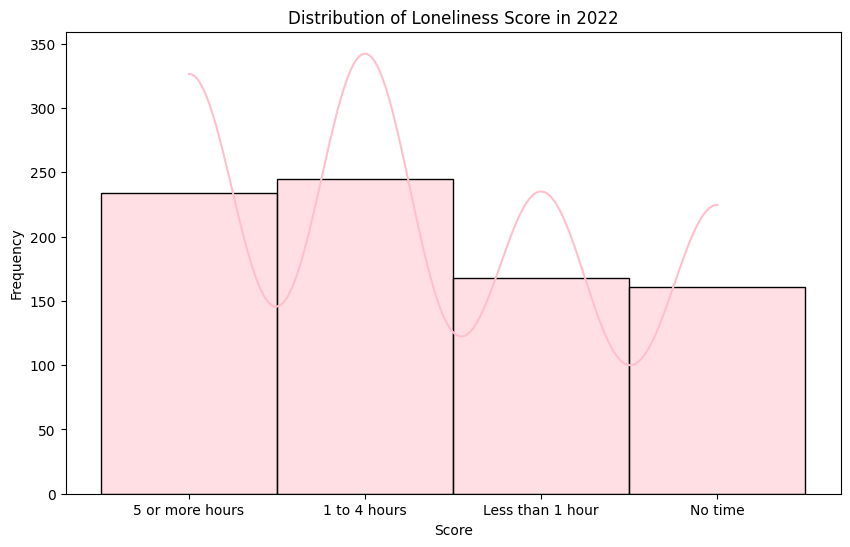

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataV2_cohortV3['CONNECTION_social_time_friends_p7d_grouped'], bins=7, kde=True, color='green')
plt.title('Distribution of Loneliness Score in 2022')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#dataV2_cohortV4_wideV2.dropna(inplace=True)
#dataV2_cohortV4_wideV2['Wellness_life_satisfaction (cohort 2022)'] = dataV2_cohortV4_wideV2['Wellness_life_satisfaction (cohort 2022)'].astype(int)
#把文字转换成数字(data summary)类似于

frequency_mapping = {
    'No time': 0,
    'Less than 1 hour': 1,
    '1 to 4 hours': 2,
    '5 or more hours': 3
}
frequency_mapping1 = {
    '1 - Less happy': 1,'2':2,'3':3,'4':4,'5':5,'6':6,'7- More happy':7
}

frequency_mapping_two_group = {
    'No time': 'low',
    'Less than 1 hour':'low',
    '1 to 4 hours': 'high',
    '5 or more hours': 'high'
}
# dataV2_cohortV3['CONNECTION_social_time_friends_p7d_grouped'] = dataV2_cohortV3['CONNECTION_social_time_friends_p7d_grouped'].map(frequency_mapping_two_group)
# print(dataV2_cohortV3['CONNECTION_social_time_friends_p7d_grouped'])

dataV2_cohortV3['CONNECTION_social_time_family_p7d_grouped'] = dataV2_cohortV3['CONNECTION_social_time_family_p7d_grouped'].map(frequency_mapping_two_group )
print(dataV2_cohortV3['CONNECTION_social_time_family_p7d_grouped'])
# dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'] = dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'].map(frequency_mapping1)
# print(dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'])



19       high
21       high
71       high
77       high
78       high
         ... 
11379     low
11380    high
11412    high
11428    high
11430    high
Name: CONNECTION_social_time_family_p7d_grouped, Length: 850, dtype: object


# ***Q3***

In [ ]:
#Q3
model=smf.ols('WELLNESS_subjective_happiness_scale_happy~CONNECTION_social_time_neighbours_p7d_grouped', data=dataV2_cohortV3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     WELLNESS_subjective_happiness_scale_happy   R-squared:                       0.030
Model:                                                   OLS   Adj. R-squared:                  0.029
Method:                                        Least Squares   F-statistic:                     21.35
Date:                                       Wed, 27 Nov 2024   Prob (F-statistic):           4.58e-06
Time:                                               03:07:59   Log-Likelihood:                -1016.0
No. Observations:                                        682   AIC:                             2036.
Df Residuals:                                            680   BIC:                             2045.
Df Model:                                                  1                                         
Covariance Type:                                   nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         4.4841      0.056     79.401      0.000       4.373       4.595
CONNECTION_social_time_neighbours_p7d_grouped     0.2380      0.052      4.621      0.000       0.137       0.339
==============================================================================
Omnibus:                       40.384   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.475
Skew:                          -0.634   Prob(JB):                     8.09e-11
Kurtosis:                       2.832   Cond. No.                         2.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we get p value is less than 0.05 and come out to be 0, which means we have very strong evidence to reject H_0 that there is no linear assication between well being and neighbour social time. And the coefficient of neighbour social time is 0.2380, which implies there is a positive linear relationship between neighbour social time and well being .

In [ ]:
model=smf.ols('WELLNESS_subjective_happiness_scale_happy~CONNECTION_social_time_neighbours_p7d_grouped', data=dataV2_cohortV3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     WELLNESS_subjective_happiness_scale_happy   R-squared:                       0.032
Model:                                                   OLS   Adj. R-squared:                  0.028
Method:                                        Least Squares   F-statistic:                     7.490
Date:                                       Wed, 27 Nov 2024   Prob (F-statistic):           6.15e-05
Time:                                               03:09:51   Log-Likelihood:                -1015.4
No. Observations:                                        682   AIC:                             2039.
Df Residuals:                                            678   BIC:                             2057.
Df Model:                                                  3                                         
Covariance Type:                                   nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             5.0488      0.119     42.504      0.000       4.816       5.282
CONNECTION_social_time_neighbours_p7d_grouped[T.5 or more hours]      0.1179      0.250      0.472      0.637      -0.372       0.608
CONNECTION_social_time_neighbours_p7d_grouped[T.Less than 1 hour]    -0.3712      0.135     -2.744      0.006      -0.637      -0.106
CONNECTION_social_time_neighbours_p7d_grouped[T.No time]             -0.5454      0.134     -4.069      0.000      -0.809      -0.282
==============================================================================
Omnibus:                       39.691   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.436
Skew:                          -0.625   Prob(JB):                     1.36e-10
Kurtosis:                       2.812   Cond. No.                         8.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

from the result we find that the p-value of 5 or more hours is greater than 0.05 and less than 1 hour and no time is less than 0.05 which means we have evidence to reject H_0 and our baseline is neigh social time of 1-4 hour , if we change from 1-4 hour to more than 5 hour, our well being will increase( since the coefficient is positive), but when we change to less time , the well being will decrease ( since the coefficient is negative)

# ***Q2***

In [ ]:
dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'] = pd.to_numeric(dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'], errors='coerce')
dataV2_cohortV3['WELLNESS_subjective_happiness_scale_happy'].dtype


dtype('float64')

In [ ]:
import pandas as pd
import pandas as pd
from scipy import stats

group_low = dataV2_cohortV3[dataV2_cohortV3['CONNECTION_social_time_friends_p7d_grouped'] == 'low']['WELLNESS_subjective_happiness_scale_happy'].dropna()
group_high = dataV2_cohortV3[dataV2_cohortV3['CONNECTION_social_time_friends_p7d_grouped'] == 'high']['WELLNESS_subjective_happiness_scale_happy'].dropna()

f_stat, p_value = stats.ttest_ind(group_low, group_high)


print(f" p值: {p_value}")


alpha = 0.05  # 显著性水平
if p_value < alpha:
    print(f"拒绝零假设，认为两组的幸福感评分存在显著差异（p < {alpha}）")
else:
    print(f"不能拒绝零假设，没有足够的证据认为两组的幸福感评分存在显著差异（p >= {alpha}）")

 p值: 0.025329835032907505
拒绝零假设，认为两组的幸福感评分存在显著差异（p < 0.05）


In [ ]:
from scipy.stats import ttest_ind, ttest_rel
t_statistic, p_value = ttest_rel(dataV2_cohortV3_wide['high'],dataV2_cohortV3_wide['long'])
print("t-statistic:", t_statistic)
print("p-value:", p_value)

CONNECTION_social_time_friends_p7d_grouped,high,low
UNIQUE_id,,
cscs_00021,5.5,NaN
cscs_00074,6.0,NaN
cscs_00080,6.0,NaN
cscs_00081,NaN,4.0
cscs_00106,NaN,6.0
...,...,...
cscs_11724,5.0,6.0
cscs_11748,NaN,3.5
cscs_11760,3.0,4.0


if our p-value is less than 0.05 , which means we have the ()evidence to reject H_0 that there is no difference between high and low group.

# ***Q1***

In [ ]:
model=smf.ols('WELLNESS_subjective_happiness_scale_happy~CONNECTION_social_time_family_p7d_grouped', data=dataV2_cohortV3).fit()
model.summary()
conf=model.conf_int()
print(conf)


                                                          0         1
Intercept                                          4.629774  4.839813
CONNECTION_social_time_friends_p7d_grouped[T.low] -0.355208 -0.023469


In [ ]:
group_low_fam = dataV2_cohortV3[dataV2_cohortV3['CONNECTION_social_time_family_p7d_grouped'] == 'low']['WELLNESS_subjective_happiness_scale_happy'].dropna()
group_high_fam = dataV2_cohortV3[dataV2_cohortV3['CONNECTION_social_time_family_p7d_grouped'] == 'high']['WELLNESS_subjective_happiness_scale_happy'].dropna()

In [ ]:
import numpy as np
from sklearn.utils import resample


def calculate_mean(data):
    return np.mean(data)


def bootstrap_ci(data, n_resamples=1000, alpha=0.05):

    means = []


    for _ in range(n_resamples):

        bootstrap_sample = resample(data, replace=True, n_samples=len(data))

        means.append(calculate_mean(bootstrap_sample))

    means = np.array(means)


    lower_ci = np.percentile(means, alpha * 100 / 2)
    upper_ci = np.percentile(means, (1 - alpha / 2) * 100)

    return lower_ci, upper_ci


ci_low = bootstrap_ci(group_low_fam)
ci_high = bootstrap_ci(group_high_fam)

print(f"Low组的置信区间: ({ci_low[0]:.2f}, {ci_low[1]:.2f})")
print(f"High组的置信区间: ({ci_high[0]:.2f}, {ci_high[1]:.2f})")

Low组的置信区间: (4.38, 4.68)
High组的置信区间: (4.62, 4.81)


In [ ]:
import numpy as np
from scipy.stats import bootstrap


def mean_diff(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

data = (group_low_fam, group_high_fam)
res = bootstrap(data, mean_diff, method='percentile', n_resamples=1000)


print("Bootstrap 置信区间:", res.confidence_interval)

# 检查两个置信区间是否重叠
ci_low = res.confidence_interval
overlap_low = np.any((ci_low[0] < 0) & (0 < ci_low[1]))  # 检查0是否在置信区间内

Bootstrap 置信区间: ConfidenceInterval(low=-0.3630304512657454, high=-0.0022856283885689384)
